In [1]:
import ROOT as rt

Welcome to JupyROOT 6.24/06


In [8]:
rt.gStyle.SetOptStat(0)

In [2]:
MULT_LOW = 0 
MULT_HIGH = 80

In [3]:
input_file = rt.TFile("../online/efficiency_run_fixed_axis.root")
input_list = input_file.Get("h-lambda_eff")
input_file.Close()

Error in <TBufferFile::CheckByteCount>: object of class TList read too many bytes: 1134380930 instead of 60639106
Warning in <TBufferFile::CheckByteCount>: TList::Streamer() not in sync with data on file ../online/efficiency_run_fixed_axis.root, fix Streamer()


In [9]:
c = rt.TCanvas("c", "c", 800, 600)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [5]:
v0_dist = input_list.FindObject("fRecoEtaPtRefitRowsRatioV0LambdaDist")
res_dist = input_list.FindObject("fRecoEtaPtRefitRowsRatioLambdaDist")

In [6]:
v0_dist.GetAxis(0).SetRangeUser(2, 4 - 0.000001)
res_dist.GetAxis(0).SetRangeUser(2, 4 - 0.000001)
v0_dist.GetAxis(5).SetRangeUser(MULT_LOW, MULT_HIGH - 0.000001)
res_dist.GetAxis(5).SetRangeUser(MULT_LOW, MULT_HIGH - 0.000001)

In [10]:
inv_mass_v0 = v0_dist.Projection(4).Clone("inv_mass_v0")
inv_mass_res = res_dist.Projection(4).Clone("inv_mass_res")
inv_mass_v0.Sumw2()
inv_mass_res.Sumw2()

Warning in <TROOT::Append>: Replacing existing TH1: fRecoEtaPtRefitRowsRatioV0LambdaDist_proj_4 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fRecoEtaPtRefitRowsRatioLambdaDist_proj_4 (Potential memory leak).
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [21]:
inv_mass_res.SetTitle("")
inv_mass_res.GetXaxis().SetTitle("M_{p#pi} (GeV/c^{2})")
inv_mass_res.GetYaxis().SetTitle("Counts per 10 MeV")

inv_mass_res.SetLineColor(rt.kBlue)
inv_mass_res.SetLineWidth(2)
inv_mass_res.SetMarkerStyle(43)
inv_mass_res.SetMarkerSize(1.5)
inv_mass_res.SetMarkerColor(rt.kBlue)

inv_mass_v0.SetLineColor(rt.kBlack)
inv_mass_v0.SetLineWidth(2)
inv_mass_v0.SetMarkerSize(1.5)
inv_mass_v0.SetMarkerStyle(43)
inv_mass_v0.SetMarkerColor(rt.kBlack)

In [16]:
inv_mass_res.GetYaxis().SetRangeUser(0, inv_mass_v0.GetMaximum()*1.1)

Info in <TCanvas::Print>: pdf file lambda_mass_resonance_mc.pdf has been created


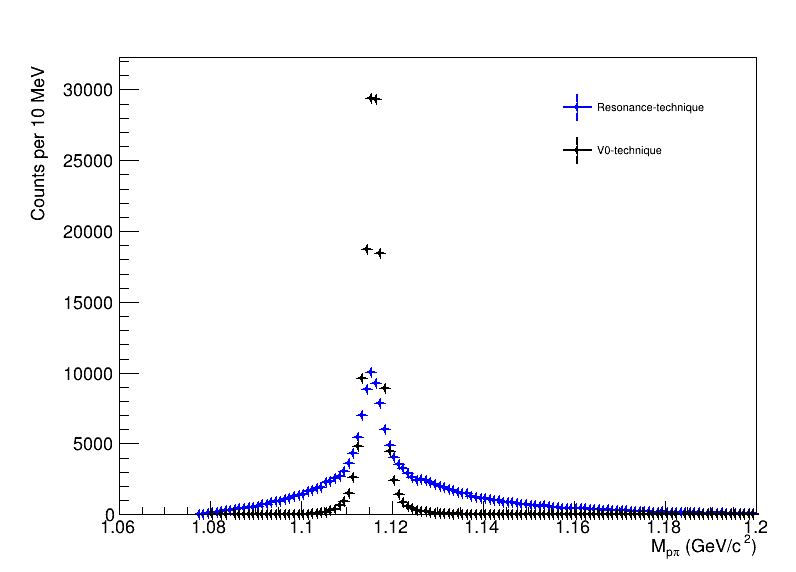

In [23]:
c.SetRightMargin(0.05)
c.SetLeftMargin(0.15)
inv_mass_res.Draw()
inv_mass_v0.Draw("SAME")
leg = rt.TLegend(0.7, 0.7, 0.9, 0.85)
leg.SetBorderSize(0)
leg.AddEntry(inv_mass_res, "Resonance-technique", "lep")
leg.AddEntry(inv_mass_v0, "V0-technique", "lep")
leg.Draw("SAME")
c.Draw()
c.SaveAs("lambda_mass_resonance_mc.pdf")

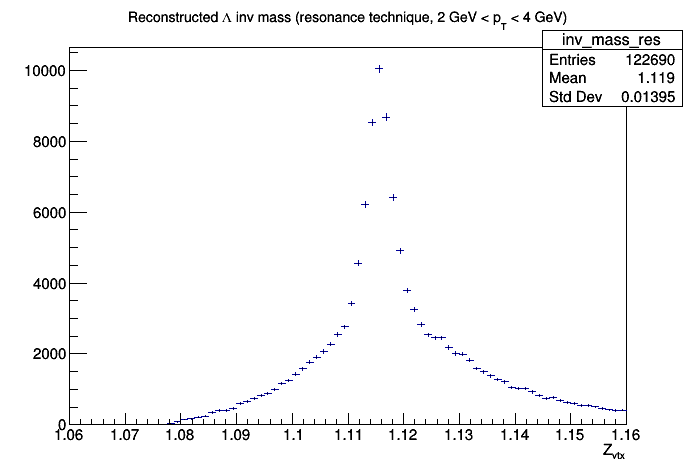

In [122]:
inv_mass_res.Sumw2()
inv_mass_res.SetTitle("Reconstructed #Lambda inv mass (resonance technique, 2 GeV < p_{T} < 4 GeV)")
inv_mass_res.Draw()
c.Draw()

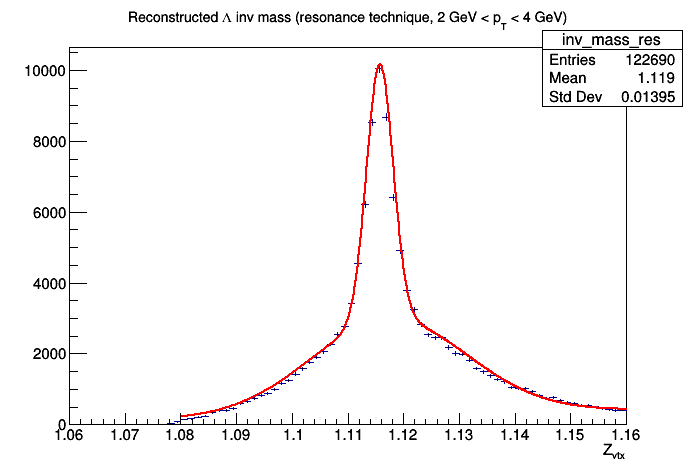

In [143]:
resonance_fit = rt.TF1("resonance_fit", "gaus(0) + gaus(3) + pol1(6)", 1.08, 1.16) 
resonance_fit.SetNpx(1000)
resonance_fit.SetParameter(0, 2.70e3)
resonance_fit.SetParameter(1, 1.1175)
resonance_fit.SetParameter(2, 0.014)
resonance_fit.SetParameter(3, 7.21581e3)
resonance_fit.SetParameter(4, 1.11581)
resonance_fit.SetParameter(5, 0.0023908)
resonance_fit.SetParameter(6, -6857/2)
resonance_fit.SetParameter(7, 6625/2)
# resonance_fit.FixParameter(3, 1.11e1)
# resonance_fit.FixParameter(4, 1.11581)
# resonance_fit.FixParameter(5, 0.01581)
# inv_mass_res.Fit(resonance_fit)
inv_mass_res.Draw()
resonance_fit.Draw("same")
c.Draw()

In [22]:
min_bin_test = inv_mass_res.FindBin(1.08)
max_bin_test = inv_mass_res.FindBin(1.16 - 0.000001)
print(inv_mass_res.GetBinContent(min_bin_test), inv_mass_res.GetBinContent(max_bin_test))
min_bin = inv_mass_res.FindBin(1.104)
max_bin = inv_mass_res.FindBin(1.128)

149.0 414.0


In [13]:
i1 = inv_mass_res.Integral(min_bin, max_bin)
i2 = inv_mass_v0.Integral(min_bin, max_bin)
print(i1, i2)

815139.0 581525.0


In [4]:
mass_lambda_v0 = input_list.FindObject("fInvMassLambdaV0")
mass_antilambda_v0 = input_list.FindObject("fInvMassAntiLambdaV0")

mass_lambda_resonance = input_list.FindObject("fInvMassLambdaResonance")
mass_antilambda_resonance = input_list.FindObject("fInvMassAntiLambdaResonance")

mass_lambda_real = input_list.FindObject("fInvMassLambdaReal")
mass_antilambda_real = input_list.FindObject("fInvMassAntiLambdaReal")

mass_lambda_difference = input_list.FindObject("fInvMassLambdaDifference")

In [5]:
mass_lambda_v0.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red) mass using offline V0 finder;#Lambda^{0} mass [GeV/c^{2}];Entries")

mass_lambda_resonance.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red) mass using resonance technique;#Lambda^{0} mass [GeV/c^{2}];Entries")

mass_lambda_real.SetTitle("#Lambda^{0} (blue) + #bar{#Lambda^{0}} (red)  mass (real) mass [GeV/c^{2}];Entries")

mass_lambda_difference.SetTitle("#Lambda^{0} mass difference (V0 - resonance);#Lambda^{0} mass [GeV/c^{2}];Entries")

In [23]:
mass_lambda_v0.SetLineColor(rt.kBlue)
mass_antilambda_v0.SetLineColor(rt.kRed)
mass_lambda_resonance.SetLineColor(rt.kBlue)
mass_antilambda_resonance.SetLineColor(rt.kRed)
mass_lambda_real.SetLineColor(rt.kBlue)
mass_antilambda_real.SetLineColor(rt.kRed)
mass_lambda_difference.SetLineColor(rt.kBlue)

In [17]:
mass_lambda_v0.Sumw2()
mass_antilambda_v0.Sumw2()
mass_lambda_resonance.Sumw2()
mass_antilambda_resonance.Sumw2()
mass_lambda_real.Sumw2()
mass_antilambda_real.Sumw2()
mass_lambda_difference.Sumw2()

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


In [18]:
mass_lambda_v0.Rebin(4)
mass_antilambda_v0.Rebin(4)
mass_lambda_resonance.Rebin(4)
mass_antilambda_resonance.Rebin(4)
mass_lambda_real.Rebin(4)
mass_antilambda_real.Rebin(4)
mass_lambda_difference.Rebin(4)

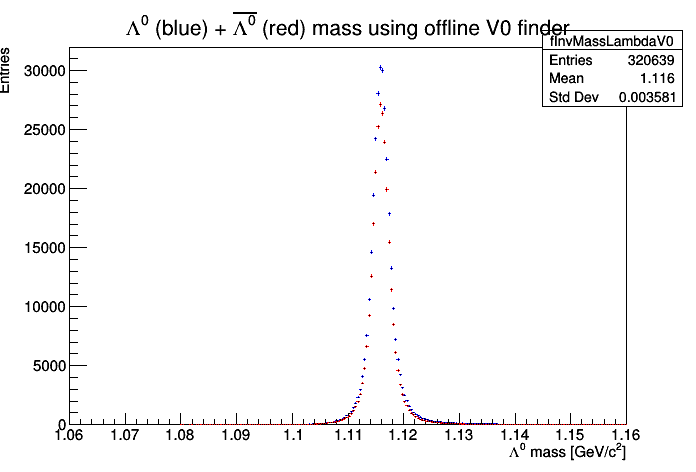

In [27]:
mass_lambda_v0.Draw()
mass_antilambda_v0.Draw("SAME")
c.Draw()

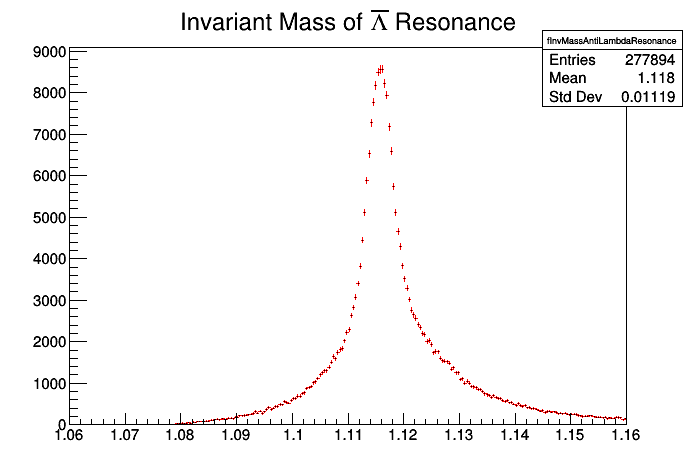

In [34]:
mass_antilambda_resonance.Draw()
c.Draw()

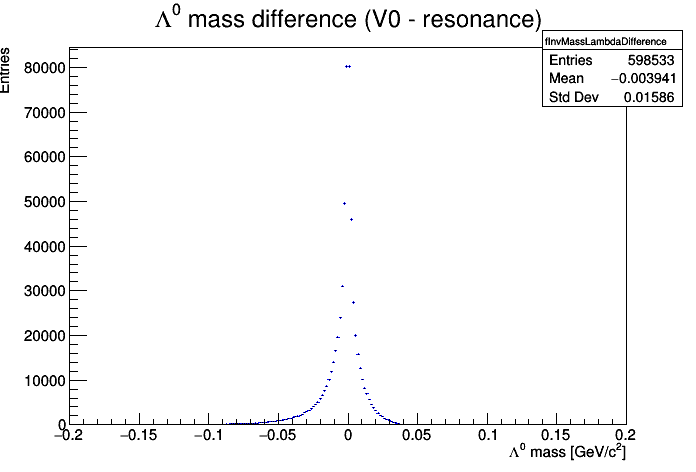

In [35]:
mass_lambda_difference.Draw()
c.Draw("SAME")

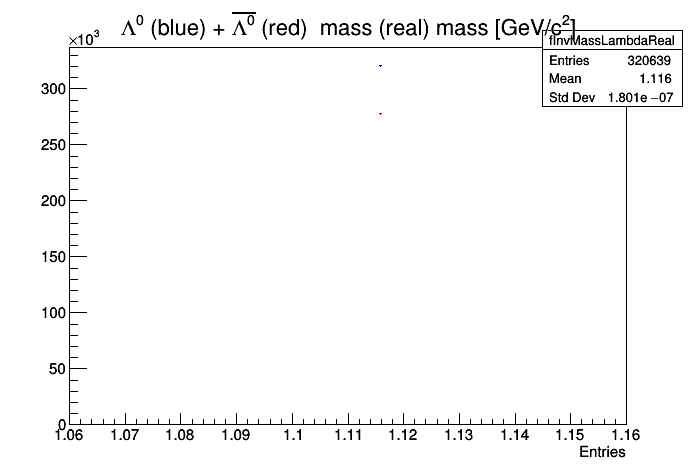

In [36]:
mass_lambda_real.Draw()
mass_antilambda_real.Draw("SAME")
c.Draw()